In [1]:
import os
os.environ['KAGGLE_USERNAME'] = "rajanpuri" # username from the json file
os.environ['KAGGLE_KEY'] = "Kaggle Key" # key from the json file

!kaggle datasets download -d gpiosenka/100-bird-species

100% 1.37G/1.37G [00:08<00:00, 103MB/s] 
100% 1.37G/1.37G [00:08<00:00, 164MB/s]


In [2]:
!unzip 100-bird-species.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/SUPERB STARLING/069.jpg  
  inflating: train/SUPERB STARLING/070.jpg  
  inflating: train/SUPERB STARLING/071.jpg  
  inflating: train/SUPERB STARLING/072.jpg  
  inflating: train/SUPERB STARLING/073.jpg  
  inflating: train/SUPERB STARLING/074.jpg  
  inflating: train/SUPERB STARLING/075.jpg  
  inflating: train/SUPERB STARLING/076.jpg  
  inflating: train/SUPERB STARLING/077.jpg  
  inflating: train/SUPERB STARLING/078.jpg  
  inflating: train/SUPERB STARLING/079.jpg  
  inflating: train/SUPERB STARLING/080.jpg  
  inflating: train/SUPERB STARLING/081.jpg  
  inflating: train/SUPERB STARLING/082.jpg  
  inflating: train/SUPERB STARLING/083.jpg  
  inflating: train/SUPERB STARLING/084.jpg  
  inflating: train/SUPERB STARLING/085.jpg  
  inflating: train/SUPERB STARLING/086.jpg  
  inflating: train/SUPERB STARLING/087.jpg  
  inflating: train/SUPERB STARLING/088.jpg  
  inflating: train/SUPERB STARLING/089.jpg  
  in

In [3]:
for i in os.listdir('/content/consolidated'):
  print(i)


AMERICAN GOLDFINCH
AMERICAN COOT
GREY PLOVER
HORNBILL
SORA
RING-NECKED PHEASANT
GOLDEN PIPIT
AMERICAN BITTERN
BARRED PUFFBIRD
WILD TURKEY
MIKADO  PHEASANT
HORNED SUNGEM
STORK BILLED KINGFISHER
EASTERN ROSELLA
HORNED GUAN
RAZORBILL
PAINTED BUNTIG
PEACOCK
KAKAPO
BROWN THRASHER
SPOONBILL
SPANGLED COTINGA
BLACK THROATED WARBLER
BAR-TAILED GODWIT
ARARIPE MANAKIN
CINNAMON TEAL
LILAC ROLLER
CAPUCHINBIRD
ASIAN CRESTED IBIS
ELEGANT TROGON
GREEN JAY
AMERICAN KESTREL
RED WINGED BLACKBIRD
KOOKABURRA
TRUMPTER SWAN
ROCK DOVE
SMITHS LONGSPUR
ELLIOTS  PHEASANT
TURKEY VULTURE
COMMON LOON
BALI STARLING
JAVAN MAGPIE
GILA WOODPECKER
DARK EYED JUNCO
VERMILION FLYCATHER
TOUCHAN
RED FACED CORMORANT
MYNA
HOUSE FINCH
GLOSSY IBIS
SAND MARTIN
D-ARNAUDS BARBET
GYRFALCON
LARK BUNTING
PALILA
SPLENDID WREN
FLAMINGO
EASTERN MEADOWLARK
NORTHERN JACANA
OSTRICH
HARPY EAGLE
NORTHERN CARDINAL
CAPE MAY WARBLER
BLUE HERON
HOUSE SPARROW
ANTBIRD
PURPLE SWAMPHEN
INDIAN BUSTARD
CALIFORNIA CONDOR
CROWNED PIGEON
CACTUS WREN
HOODE

In [4]:
train=os.listdir('train')
test=os.listdir('test')
valid=os.listdir('valid')

print(len(train))
print(len(test))
print(len(valid))

225
225
225


In [5]:
for i in train:
  path= "train/" + i
  print(i,len(os.listdir(path)))

AMERICAN GOLDFINCH 133
AMERICAN COOT 158
GREY PLOVER 120
HORNBILL 122
SORA 300
RING-NECKED PHEASANT 97
GOLDEN PIPIT 113
AMERICAN BITTERN 170
BARRED PUFFBIRD 136
WILD TURKEY 144
MIKADO  PHEASANT 146
HORNED SUNGEM 126
STORK BILLED KINGFISHER 135
EASTERN ROSELLA 118
HORNED GUAN 113
RAZORBILL 194
PAINTED BUNTIG 163
PEACOCK 156
KAKAPO 130
BROWN THRASHER 99
SPOONBILL 192
SPANGLED COTINGA 112
BLACK THROATED WARBLER 135
BAR-TAILED GODWIT 114
ARARIPE MANAKIN 105
CINNAMON TEAL 117
LILAC ROLLER 138
CAPUCHINBIRD 133
ASIAN CRESTED IBIS 105
ELEGANT TROGON 144
GREEN JAY 156
AMERICAN KESTREL 130
RED WINGED BLACKBIRD 127
KOOKABURRA 143
TRUMPTER SWAN 137
ROCK DOVE 132
SMITHS LONGSPUR 116
ELLIOTS  PHEASANT 148
TURKEY VULTURE 149
COMMON LOON 109
BALI STARLING 132
JAVAN MAGPIE 109
GILA WOODPECKER 146
DARK EYED JUNCO 203
VERMILION FLYCATHER 155
TOUCHAN 136
RED FACED CORMORANT 127
MYNA 141
HOUSE FINCH 249
GLOSSY IBIS 175
SAND MARTIN 95
D-ARNAUDS BARBET 233
GYRFALCON 124
LARK BUNTING 117
PALILA 119
SPLENDID W

In [6]:
from keras.preprocessing import image
import matplotlib.pyplot as plt

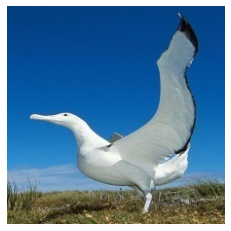

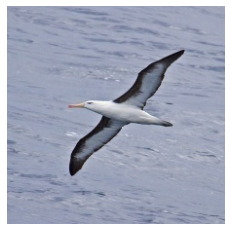

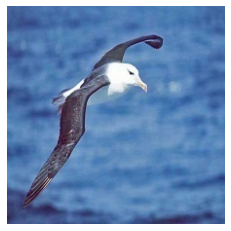

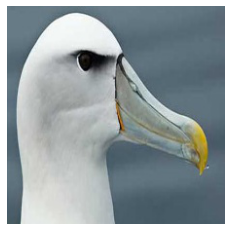

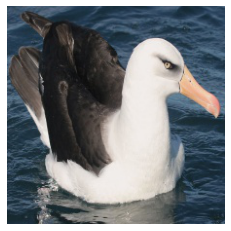

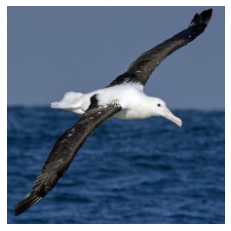

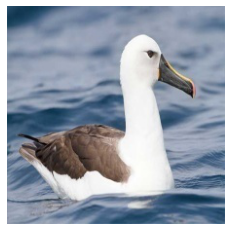

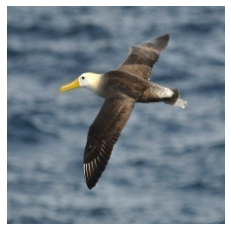

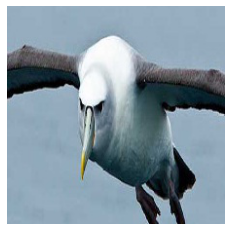

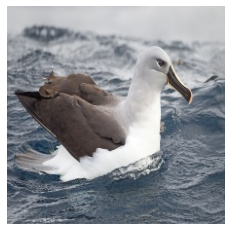

In [7]:
x=os.listdir('/content/train/ALBATROSS/')
for i in x[:10]:
  img=image.load_img('/content/train/ALBATROSS/'+i)
  img=image.img_to_array(img)
  img=img/255.0
  plt.imshow(img)
  plt.axis('off')
  plt.show()

In [8]:
from keras.preprocessing.image import ImageDataGenerator
train_gen = ImageDataGenerator(
        rescale=(1/255.0),
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

training=train_gen.flow_from_directory(
    "train",
    target_size=(224,224),
    class_mode='categorical',
     batch_size=64
)
val_gen=ImageDataGenerator(rescale=1/255.0)
val=val_gen.flow_from_directory(
    "valid",
    target_size=(224,224),
    class_mode="categorical",
    batch_size=64
)
test= ImageDataGenerator(rescale=1/255.0)
testing=test.flow_from_directory(
    "test",
    target_size=(224,224),
    class_mode="categorical",
    batch_size=64
)

Found 31316 images belonging to 225 classes.
Found 1125 images belonging to 225 classes.
Found 1125 images belonging to 225 classes.


In [9]:
from keras.models import Model
from keras.applications.vgg16 import VGG16 
from keras.layers import *


In [10]:
model1=VGG16(include_top=False,weights = 'imagenet',input_shape=(224,224,3))
model1.summary()

58892288/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
______________________________________________________________

In [11]:
for i in range(len(model1.layers)):
  print(i,model1.layers[i])

0 <tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7fd60262de80>
1 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fd602639fd0>
2 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fd5ca92c390>
3 <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fd5ca92c748>
4 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fd5ca8f2438>
5 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fd5ca8f62e8>
6 <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fd5ca8f66d8>
7 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fd5ca8f6eb8>
8 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fd5ca8ffd30>
9 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fd5ca8ff9e8>
10 <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fd5ca904a20>
11 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fd5ca907550>
12 <tensorflow.python.ke

In [12]:
for i in range(len(model1.layers)):
  model1.layers[i].trainable=False
model1.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [15]:
av= GlobalAveragePooling2D()(model1.output)
av1 = Dense(1024,activation = 'relu')(av)
av2=Dropout(0.2)(av1)
av1 = Dense(1024,activation = 'relu')(av)
av2=Dropout(0.2)(av1)
av3=Dense(225,activation='softmax')(av2)
model_new = Model( inputs = model1.input, outputs = av3)
model_new.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [16]:
from keras.optimizers import Adam
adam = Adam(lr=0.001)
model_new.compile(optimizer='adam',loss="categorical_crossentropy",metrics=['accuracy'])

In [17]:
#each epoch take 20 mins 

In [19]:
from keras.callbacks import  EarlyStopping, ModelCheckpoint
filepath='/content/drive/My Drive/PROJECTS/birds/model_birds_vgg_02.hdf5'

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callback = EarlyStopping(monitor='val_loss', patience=2)
call = [checkpoint, callback]
his = model_new.fit_generator(training,epochs=100,validation_data=val,callbacks = call)

Epoch 1/100
490/490 [==============================] - ETA: 0s - loss: 4.4337 - accuracy: 0.1183
Epoch 00001: val_loss improved from inf to 3.14969, saving model to /content/drive/My Drive/PROJECTS/birds/model_birds_vgg_02.hdf5
490/490 [==============================] - 379s 774ms/step - loss: 4.4337 - accuracy: 0.1183 - val_loss: 3.1497 - val_accuracy: 0.3129
Epoch 2/100
490/490 [==============================] - ETA: 0s - loss: 3.0083 - accuracy: 0.3256
Epoch 00002: val_loss improved from 3.14969 to 2.18749, saving model to /content/drive/My Drive/PROJECTS/birds/model_birds_vgg_02.hdf5
490/490 [==============================] - 381s 777ms/step - loss: 3.0083 - accuracy: 0.3256 - val_loss: 2.1875 - val_accuracy: 0.4880
Epoch 3/100
490/490 [==============================] - ETA: 0s - loss: 2.4093 - accuracy: 0.4398
Epoch 00003: val_loss improved from 2.18749 to 1.70709, saving model to /content/drive/My Drive/PROJECTS/birds/model_birds_vgg_02.hdf5
490/490 [=============================

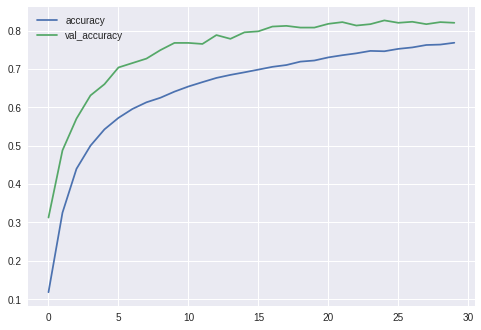

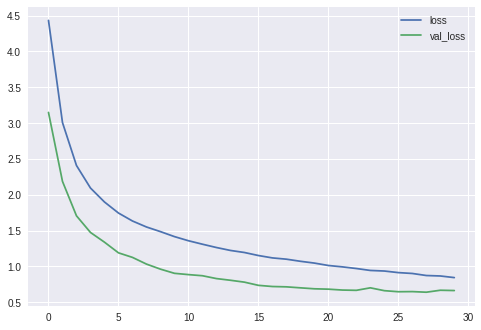

In [20]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

plt.plot(his.history['accuracy'],label='accuracy')
plt.plot(his.history['val_accuracy'],label='val_accuracy')

plt.legend()
plt.show()
plt.plot(his.history['loss'],label='loss')
plt.plot(his.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

In [21]:
model_new.evaluate(training)

490/490 [==============================] - 355s 724ms/step - loss: 0.6633 - accuracy: 0.8269


[0.6632869839668274, 0.8268936276435852]

In [22]:
model_new.evaluate(testing)

18/18 [==============================] - 4s 226ms/step - loss: 0.5537 - accuracy: 0.8489


[0.5537064075469971, 0.8488888740539551]

In [23]:
model_json = model_new.to_json()


with open("/PROJECTS/birds/model_02.json", "w") as json_file:
    json_file.write(model_json)